# Linear Regression

In [1]:
from si.data import Dataset, summary,StandardScaler
from si.supervised import LinearRegression,LinearRegressionReg
import numpy as np
import os

In [12]:
DIR = os.path.dirname(os.path.realpath('.'))
filename = os.path.join(DIR, 'datasets/hearts.data')
dataset = Dataset.from_data(filename, labeled=True)
StandardScaler().fit_transform(dataset,inline=True)
summary(dataset)

,A,B,C,D,E,F,G,H,I,J,K,L,M,y
mean,3.651400e-16,-9.539694e-17,4.276415e-17,5.394862e-16,-2.500058e-16,6.908054e-17,8.223874e-17,1.644775e-17,5.098802e-17,7.204114e-16,-1.266477e-16,-6.579099e-17,7.565964e-17,0.444444
var,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.246914
min,-2.797275e+00,-1.450327e+00,-2.292532e+00,-2.094649e+00,-2.396942e+00,-4.170288e-01,-1.026285e+00,-3.402609e+00,-7.012223e-01,-9.185652e-01,-9.542343e-01,-7.115349e-01,-8.757058e-01,0.000000
max,2.481986e+00,6.894997e-01,8.709276e-01,3.850888e+00,6.093004e+00,2.397916e+00,9.816636e-01,2.262800e+00,1.426081e+00,4.505343e+00,2.307073e+00,2.472682e+00,1.189277e+00,1.000000


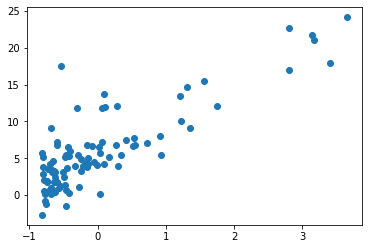

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
if dataset.X.shape[1]==1:
    plt.scatter(dataset.X, dataset.y)
    plt.show()


## Linear Regression using closed form 

In [13]:
lr = LinearRegression()
lr.fit(dataset)
print('Theta = ', lr.theta)

Theta =  [ 0.44444444 -0.01695213  0.07450927  0.08901536  0.0365427   0.0310992
 -0.02876549  0.03925668 -0.06292523  0.05416595  0.04990739  0.02920038
  0.12734696  0.11518954]


In [20]:
idx = 1
x = dataset.X[idx]
print("x = ",x)
y = dataset.y[idx]
y_pred = lr.predict(x)
print("y_pred = ",y_pred)
print("y_true = ", y)


x =  [ 0.2822938  -1.45032695  0.87092765 -0.63630951  2.02248236 -0.41702883
 -1.02628472  0.57615147  1.4260813  -0.39367078 -0.95423434 -0.71153494
 -0.87570581]
y_pred =  0.22326834350695113
y_true =  0.0


In [21]:
lr.cost()

0.05614250670273697

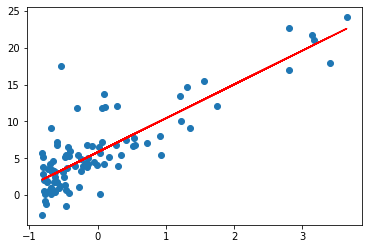

In [7]:
if dataset.X.shape[1] == 1:
    plt.scatter(dataset.X, dataset.y)
    plt.plot(lr.X[:,1], np.dot(lr.X, lr.theta), '-', color='red')
    plt.show()


## Linear Regression using gradient descent

In [22]:
lr = LinearRegression(gd=True,epochs=50000)
lr.fit(dataset)
print('Theta = ', lr.theta)

Theta =  [ 0.44444444 -0.01695213  0.07450927  0.08901536  0.0365427   0.0310992
 -0.02876549  0.03925668 -0.06292523  0.05416595  0.04990739  0.02920038
  0.12734696  0.11518954]


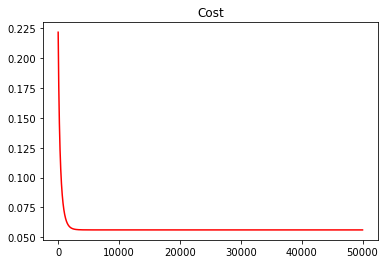

In [23]:
plt.plot(list(lr.history.keys()), [ y[1] for y in lr.history.values()], '-', color='red')
plt.title('Cost')
plt.show()

In [24]:
lr.cost()

0.05614225302212007

# Linear Regression with Regularization

In [25]:
lr = LinearRegressionReg()
lr.fit(dataset)
print('Theta = ', lr.theta)


Theta =  [ 0.44444444 -0.01658639  0.0743626   0.08886214  0.03635081  0.03099407
 -0.0286115   0.0391624  -0.06274796  0.05423135  0.04997226  0.02922547
  0.12689304  0.11495584]


In [27]:
idx = 1
x = dataset.X[idx]
print("x = ", x)
y = dataset.y[idx]
y_pred = lr.predict(x)
print("y_pred = ", y_pred)
print("y_true = ", y)


x =  [ 0.2822938  -1.45032695  0.87092765 -0.63630951  2.02248236 -0.41702883
 -1.02628472  0.57615147  1.4260813  -0.39367078 -0.95423434 -0.71153494
 -0.87570581]
y_pred =  0.22326834350695113
y_true =  0.0


In [28]:
lr.cost()

0.05614250670273697

# Logistic Regression

In [30]:
from si.supervised import LogisticRegression, LogisticRegressionReg
import pandas as pd

In [12]:
#filename = os.path.join(DIR, 'datasets/iris.data')
#df = pd.read_csv(filename)
#iris = Dataset.from_dataframe(df,ylabel="class")
#y = [int(x != 'Iris-setosa') for x in iris.y]
#dataset = Dataset(iris.X[:,:2],np.array(y))
#summary(dataset)

,A,B,y
mean,5.843333,3.054000,0.666667
var,0.681122,0.186751,0.222222
min,4.300000,2.000000,0.000000
max,7.900000,4.400000,1.000000


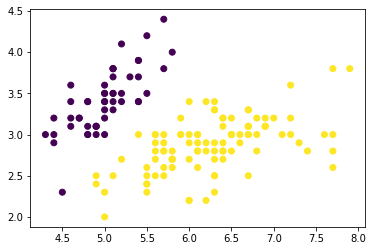

In [13]:
plt.scatter(dataset.X[:,0], dataset.X[:,1],c=dataset.y)
plt.show()

In [35]:
logreg = LogisticRegression(epochs=100000)

In [36]:
logreg.fit(dataset)
logreg.theta

array([-0.25099794, -0.15890798,  0.72066983,  0.66467886,  0.44956255,
        0.37289453, -0.2823539 ,  0.30047417, -0.48662554,  0.38987652,
        0.39286776,  0.27122651,  1.09785643,  0.66128164])

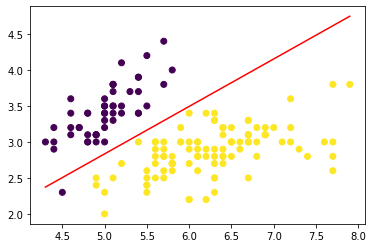

In [16]:
plt.scatter(dataset.X[:,0], dataset.X[:,1],c=dataset.y)
_x = np.linspace(min(dataset.X[:,0]),max(dataset.X[:,0]),2)
_y = [(-logreg.theta[0]-logreg.theta[1]*x)/logreg.theta[2] for x in _x]
plt.plot(_x, _y, '-', color='red')
plt.show()

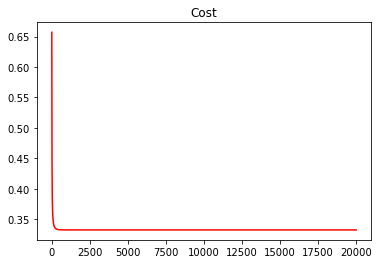

In [33]:
plt.plot(list(logreg.history.keys()), [ y[1] for y in logreg.history.values()], '-', color='red')
plt.title('Cost')
plt.show()

In [37]:
logreg.cost()

0.33258850789343

In [18]:
ex = np.array([5.5, 2])
print("Pred. example:", logreg.predict(ex))


Pred. example: 1


# Logistic Regression with L2 regularization

In [19]:
logreg = LogisticRegressionReg()
logreg.fit(dataset)
logreg.theta

array([-0.88465655,  2.34501229, -3.72252587])

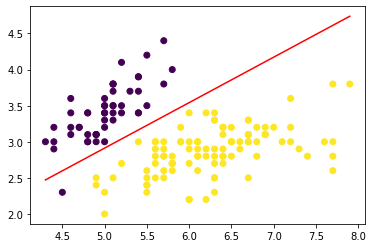

In [20]:
plt.scatter(dataset.X[:,0], dataset.X[:,1],c=dataset.y)
_x = np.linspace(min(dataset.X[:,0]),max(dataset.X[:,0]),2)
_y = [(-logreg.theta[0]-logreg.theta[1]*x)/logreg.theta[2] for x in _x]
plt.plot(_x, _y, '-', color='red')
plt.show()

In [21]:
ex = np.array([5.5, 2])
print("Pred. example:", logreg.predict(ex))


Pred. example: 1


# Cross-validation

In [22]:
from si.util import CrossValidationScore

In [24]:
logreg = LogisticRegression(epochs=1000)
cv = CrossValidationScore(logreg,dataset,cv=5)
cv.run()
cv.toDataframe()

,Train Scores,Test Scores
0,0.077947,0.104602
1,0.091300,0.069226
2,0.065516,0.169872
3,0.082540,0.099529
4,0.070054,0.138889


In [25]:
logreg = LogisticRegressionReg(epochs=500, lbd=0.5)
cv = CrossValidationScore(logreg, dataset, cv=4)
cv.run()
cv.toDataframe()

,Train Scores,Test Scores
0,0.175962,0.268659
1,0.174419,0.279721
2,0.178894,0.256264
3,0.164381,0.310746


# Grid Search with Cross-Validation

In [26]:
from si.util import GridSearchCV

In [31]:
parameters ={'epochs':[100,200,400,800,1000],'lbd':[0,0.2,0.4,0.6]}
gs = GridSearchCV(logreg, dataset, parameters, cv=3, split=0.8)
gs.run()
df = gs.toDataframe()

In [32]:
df.sort_values(by=['CV_1 train','CV_1 test'])

,epochs,lbd,CV_1 train,CV_1 test,CV_2 train,CV_2 test,CV_3 train,CV_3 test
16,1000,0.0,0.089957,0.073837,0.087457,0.083139,0.082723,0.104220
12,800,0.0,0.104675,0.069143,0.097580,0.094871,0.081422,0.151326
17,1000,0.2,0.117527,0.195598,0.122199,0.177352,0.115399,0.200793
13,800,0.2,0.123826,0.193657,0.111756,0.235957,0.124687,0.199215
18,1000,0.4,0.144526,0.267949,0.145599,0.263016,0.144618,0.268178
8,400,0.0,0.145804,0.160368,0.151073,0.111532,0.154837,0.107870
14,800,0.4,0.151069,0.254449,0.151485,0.249140,0.144943,0.278321
19,1000,0.6,0.155433,0.382003,0.171694,0.311334,0.172473,0.305875
9,400,0.2,0.169764,0.171419,0.144295,0.257840,0.162318,0.192780
15,800,0.6,0.171040,0.311291,0.171123,0.312847,0.167213,0.330959
